In [ ]:


def classify(features_train, labels_train):
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0)
    
    ### your code goes here--should return a trained decision tree classifer

    
    
    return clf

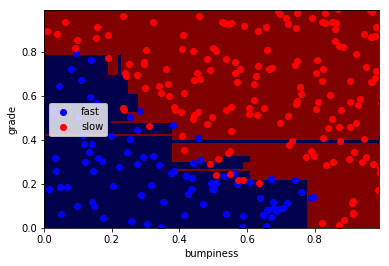

In [47]:
import warnings
warnings.filterwarnings('ignore')
""" lecture and example code for decision tree unit """
import sys
sys.path.append("C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/tools/")
sys.path.append('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/choose_your_own')
sys.path.append('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/svm')

import os
os.chdir('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/decision_tree')

from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

from sklearn import tree

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!


clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)



#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())

In [3]:

########################## SVM #################################


# method 1
acc1= clf.score(features_test, labels_test)

# method 2
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)

print (acc)
print(acc1)

0.912
0.912


In [10]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
clf2 = tree.DecisionTreeClassifier(min_samples_split=2)
clf2 = clf2.fit(features_train, labels_train)
clf50 = tree.DecisionTreeClassifier(min_samples_split=50)
clf50 = clf50.fit(features_train, labels_train)
# method 1
acc2= clf2.score(features_test, labels_test)
acc50= clf50.score(features_test, labels_test)

print (acc2)
print(acc50)


0.908
0.912


In [44]:



features_train, labels_train, features_test, labels_test = makeTerrainData()



########################## DECISION TREE #################################
clf2 = tree.DecisionTreeClassifier(min_samples_split=2)
clf2 = clf2.fit(features_train, labels_train)
clf50 = tree.DecisionTreeClassifier(min_samples_split=50)
clf50 = clf50.fit(features_train, labels_train)
# method 1
acc2= clf2.score(features_test, labels_test)
acc50= clf50.score(features_test, labels_test)

### your code goes here--now create 2 decision tree classifiers,
### one with min_samples_split=2 and one with min_samples_split=50
### compute the accuracies on the testing data and store
### the accuracy numbers to acc_min_samples_split_2 and
### acc_min_samples_split_50, respectively

clf2 = tree.DecisionTreeClassifier(min_samples_split=2)
clf2 = clf2.fit(features_train, labels_train)

clf50 = tree.DecisionTreeClassifier(min_samples_split=50)
clf50 = clf50.fit(features_train, labels_train)
#clf50 = classify(features_train, labels_train, min_samples_split=50)
#clf = tree.DecisionTreeClassifier(min_samples_split=50).fit(features_train, labels_train)

acc_min_samples_split_2 = clf2.score(features_test, labels_test)
acc_min_samples_split_50 = clf50.score(features_test, labels_test)

print(acc_min_samples_split_2)
print(acc_min_samples_split_50)

0.908
0.912


In [36]:
#To calculate the entropy of the example
import math
#-0.5*math.log(0.5,2)-0.5*math.log(0.5,2)
1- (3/4*(-2/3*math.log(2/3,2) -1/3*math.log(1/3,2) ))

0.31127812445913283

In [40]:
#!/usr/bin/python
import pickle
import _pickle as cPickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../tools/word_data.pkl", authors_file="../tools/email_authors.pkl", percentile=10):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features
        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions
        4 objects are returned:
            -- training/testing features
            -- training/testing labels
    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print ("no. of Chris training emails:", sum(labels_train))
    print ("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [43]:
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)

print( clf.score(features_test, labels_test))

0.912


In [45]:
""" 
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
from time import time
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess(1)




#########################################################
### your code goes here ###
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)

print(clf.score(features_test, labels_test))

OSError: [Errno 9] Bad file descriptor

In [28]:
#Speeding up via reducing feature selection
# To find the number of features
print (features_train.shape)


(15820, 3785)


In [46]:


# I made "percentile" an input argument for preprocess with default value 10
features_train, features_test, labels_train, labels_test = preprocess()
print (features_train.shape)


MemoryError: 